# Inferential Statistics & Sampling

# Sampling

Samples are extracted from the population and must meet two requirements:

- *Must be statistically significant (big enough to take conclusion)*
- *not biased*

There are 3 types of sampling:

- simple random sampling
- systematic sampling
- stratified sampling

In [1]:
pip install -r requirements.txt

^C


  Using cached pingouin-0.5.3-py3-none-any.whl (198 kB)
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached xarray-2023.8.0-py3-none-any.whl (1.0 MB)


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import io
import math
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats
import pingouin

#### Database to work

Database of the mexican government, contains information about hotels, museums and marketplaces at "El centro historico de la Ciudad de Mexico"

In [ ]:
econdata = pd.read_csv("econdata.csv")

In [ ]:
econdata.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


## Types of sampling

### Simple random sampling

This technique consists of just extracting completely random samples

In [ ]:
rand1 = econdata.sample(n=8)
rand1

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
30,30,"19.427530818,-99.1479200065","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_068_13,Cuautémoc,B,Hotel,Villa Pal
103,103,"19.4370810464,-99.1361494106","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_091_27,Cuautémoc,A,Hotel,Cuba
145,145,"19.4340221684,-99.1358187396","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_012_11,Cuautémoc,A,Hotel,Rioja
65,65,"19.425466805,-99.1380880561","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_073_20,Cuautémoc,B,Hotel,Mar
125,125,"19.4342350395,-99.1354548065","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_007_06,Cuautémoc,A,Hotel,Zamora
25,25,"19.42477346,-99.12881894","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",307_123_30,Cuautémoc,B,Hotel,Madrid
111,111,"19.4430614318,-99.1353793874","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_107_02,Cuautémoc,B,Hotel,Embajadores
59,59,"19.4275850427,-99.1397624613","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_061_03,Cuautémoc,A,Hotel,Señorial


You can do it by specifying a seed

Example:

set a seed: 18900217

In [ ]:
rand2 = econdata.sample(n=8, random_state=18900217)
rand2

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
69,69,"19.43558625,-99.12965746","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",005_129_08,Cuautémoc,A,Hotel,Templo Mayor
180,180,"19.4357633849,-99.1330511805","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_094_32,Cuautémoc,A,Hotel,"Catedral, S.A. DE C.V."
25,25,"19.42477346,-99.12881894","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",307_123_30,Cuautémoc,B,Hotel,Madrid
83,83,"19.4342251093,-99.1449434443","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_018_03,Cuautémoc,B,Hotel,San Francisco
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico
181,181,"19.4451852396,-99.1478597989","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_103_01,Cuautémoc,B,Hotel,Yale
117,117,"19.4253041176,-99.1405962735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_078_03,Cuautémoc,B,Hotel,Mazatlán
182,182,"19.42407591,-99.1424737531","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_094_26,Cuautémoc,B,Hotel,Macao


In [ ]:
# Extract a random 25% of your population

prop_25 = econdata.sample(frac = .25)
prop_25

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
61,61,"19.4343847692,-99.125125489","{""type"": ""Polygon"", ""coordinates"": [[[-99.1257...",005_140_01,Cuauhtémoc,B,Mercado,Mixcalco
138,138,"19.4330991176,-99.1423784309","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_024_08,Cuautémoc,B,Hotel,Marlowe
33,33,"19.4341938751,-99.1352210651","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_007_04,Cuautémoc,A,Hotel,Washingtonw
178,178,"19.4457531395,-99.1485982115","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_069_11,Cuautémoc,B,Hotel,Norte
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
161,161,"19.4356652812,-99.1386591361","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_003_12,Cuautémoc,A,Museo,La Tortura
190,190,"19.43311885,-99.14512643","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_019_02,Cuautémoc,B,Hotel,Metropol
124,124,"19.4297560476,-99.1253498219","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_052_01,Cuautémoc,A,Hotel,Universo
63,63,"19.4339116282,-99.1468371035","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_015_07,Cuautémoc,B,Hotel,Calvin
229,229,"19.4346765421,-99.1318394918","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",005_145_14,Cuautémoc,A,Museo,Templo Mayor


### Systematic sampling

This technique extracts samples based on a condition or rule

example:

*Let's define a function to take samples each $n$ rows*

In [ ]:
# let's take samples each 3 rows

def systematic_sampling(econdata, step):
    indexes = np.arange(0, len(econdata), step=step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

In [ ]:
systematic_sample = systematic_sampling(econdata,3)
systematic_sample.head(20)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
15,15,"19.42413788,-99.1324515","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_153_11,Cuautémoc,B,Hotel,San Lucas
18,18,"19.4331161255,-99.1309438719","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_021_01,Cuautémoc,A,Museo,Museo Nacional de las Culturas
21,21,"19.43614459,-99.13945267","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_098_01,Cuautémoc,A,Museo,Telégrafo
24,24,"19.4285279152,-99.147008562","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_067_19,Cuautémoc,B,Hotel,Fornos
27,27,"19.4348360773,-99.1463945583","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_016_01,Cuautémoc,B,Hotel,Hilton Centro Histórico


#### Samples equally distanced

*Now, Let's take 10 samples equally distanced*

In [ ]:
sample_size = 10
interval = int( len(econdata) / sample_size )

econdata.iloc[::interval]#.reset_index()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
23,23,"19.4390916028,-99.1493421468","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_147_01,Cuautémoc,B,Hotel,La Fuente
46,46,"19.426941681,-99.1326869759","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_090_12,Cuautémoc,A,Hotel,Castropol
69,69,"19.43558625,-99.12965746","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",005_129_08,Cuautémoc,A,Hotel,Templo Mayor
92,92,"19.4383554723,-99.1327563513","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_082_19,Cuautémoc,A,Hotel,Tuxpan
115,115,"19.4336966991,-99.1237253904","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_010_09,Venustiano Carranza,B,Hotel,Antas
138,138,"19.4330991176,-99.1423784309","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_024_08,Cuautémoc,B,Hotel,Marlowe
161,161,"19.4356652812,-99.1386591361","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_003_12,Cuautémoc,A,Museo,La Tortura
184,184,"19.4306993983,-99.1389056387","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_043_01,Cuautémoc,A,Hotel,"La Casa de la Luna, S.A. DE C.V."
207,207,"19.4344738803,-99.1305689118","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_13,Cuautémoc,A,Museo,Autonomía Universitaria


### Stratified sampling

This type of sampling consists in creating *homogeneus exclusive groups* and from there, create a random sample

#### Proportional stratified sample

Suppose you have a dataset and you would like to take a sample that has the same proportions as the population

In [ ]:
penguins = sns.load_dataset("penguins")

penguins["species"].value_counts(normalize=True)

Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

In that case you have:

1. Group by the column that contains the proportion
2. Sample using the frac= argument, to base in a proportion

In [ ]:
prop_sample = penguins.groupby("species").sample(frac=0.1)

prop_sample["species"].value_counts(normalize=True)

Adelie       0.441176
Gentoo       0.352941
Chinstrap    0.205882
Name: species, dtype: float64

Note that the sample still contains the same proportion than the original dataset does. In addition, it contains a random 10% of the original data

#### Equal count stratified sampling



This process allows to take an equal number of samples based on a variable

In [ ]:
equal_sample = penguins.groupby("species").sample(n=15)

equal_sample["species"].value_counts(normalize=True)

Chinstrap    0.333333
Gentoo       0.333333
Adelie       0.333333
Name: species, dtype: float64

#### Weighted random sampling

this one adjusts the relative probability of a row being sampled

Example:

Let's take samples so that **Adelie** has the double of probability

first you must create a column, assign 2 if the specie is Adelie, otherwise assign 1

In [ ]:
condition = penguins["species"] == "Adelie"

penguins["weight"] = np.where(condition, 2, 1)

Now take the sample with the argument weight

In [ ]:
penguins_weight = penguins.sample(frac=0.1, weights="weight")

penguins_weight["species"].value_counts(normalize=True)

Adelie       0.676471
Gentoo       0.205882
Chinstrap    0.117647
Name: species, dtype: float64

#### Proportional stratified sample (given a proportion)

In this case, we are not neccesarily sampling based on a dataset proportion. Now we are going to provide the proportion to our funtion.

In [ ]:
# 1st step: Create your stratification variable

econdata["estratificado"] = econdata["delegacion"] + ", " + econdata["tipo"]
(econdata["estratificado"].value_counts()/len(econdata)).sort_values(ascending=False)

Cuautémoc, Hotel                0.643478
Cuautémoc, Museo                0.156522
Venustiano Carranza, Hotel      0.078261
Cuauhtémoc, Mercado             0.073913
Venustiano Carranza, Mercado    0.047826
Name: estratificado, dtype: float64

The output above shows the proportion of the variables in the dataset.

**Suppose now you want to extract a sample with the following proportion:**

Cuautémoc,Hotel                0.5
Cuautémoc,Museo                0.2
Venustiano Carranza,Hotel      0.1
Cuauhtémoc,Mercado             0.1
Venustiano Carranza,Mercado    0.1

*Let's create a function that can extract a sample with that given proportion.*

In [ ]:
def stratified_data(econdata, strat_cols, strat_values, strat_prop, random_state=None):
    df_strat = pd.DataFrame(columns=econdata.columns)

    pos = -1
    for i in range(len(strat_values)):
        pos += 1
        if pos == len(strat_values) - 1:
            ratio_len = len(econdata) - len(df_strat)
        else:
            ratio_len = int(len(econdata) * strat_prop[i])

        df_filtered = econdata[econdata[strat_cols] == strat_values[i]]
        df_temp = df_filtered.sample(replace=True, n=ratio_len, random_state=random_state)

        df_strat = pd.concat([df_strat, df_temp])
    return df_strat

In [ ]:
strat_values = list(econdata["estratificado"].unique())
strat_prop = [0.5, 0.2, 0.1, 0.1, 0.1]

# Using the function with the given parameters
df_strat = stratified_data(econdata, "estratificado", strat_values, strat_prop, random_state=42)

df_strat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
78,78,"19.4430578017,-99.13614342","{""type"": ""Polygon"", ""coordinates"": [[[-99.1368...",004_107_01,Cuauhtémoc,B,Mercado,La Lagunilla,"Cuauhtémoc, Mercado"
162,162,"19.4452741596,-99.1443205075","{""type"": ""Polygon"", ""coordinates"": [[[-99.1448...",003_044_01,Cuauhtémoc,B,Mercado,Martínez de la Torre,"Cuauhtémoc, Mercado"
129,129,NaN,NaN,005_125_01,Cuauhtémoc,A,Mercado,Abelardo,"Cuauhtémoc, Mercado"
79,79,"19.4299360348,-99.1445730919","{""type"": ""Polygon"", ""coordinates"": [[[-99.1450...",002_047_11,Cuauhtémoc,B,Mercado,San Juan,"Cuauhtémoc, Mercado"
78,78,"19.4430578017,-99.13614342","{""type"": ""Polygon"", ""coordinates"": [[[-99.1368...",004_107_01,Cuauhtémoc,B,Mercado,La Lagunilla,"Cuauhtémoc, Mercado"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza, Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza, Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza, Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza, Mercado"


*let's confirm if the proportion is the desired*

In [ ]:
(
    (df_strat["estratificado"].value_counts()/len(econdata))
    .sort_values(ascending=False)
)

Cuauhtémoc, Mercado             0.5
Cuautémoc, Museo                0.2
Venustiano Carranza, Hotel      0.1
Venustiano Carranza, Mercado    0.1
Cuautémoc, Hotel                0.1
Name: estratificado, dtype: float64

### Cluster sampling

Cluster sampling consists in taking some subgroups using random sampling

And then use simple random sampling in those groups

<img src="image-20230205-201756.png"  width="600" height="300">

### Bonus: Calculate mean per categories

Whenever you want to calculate an average for a variable bases on a category, you can use the pandas function groupby(). The expression is:

**DataFrame.Groupby("categorical_variable")["Numerical_variable"].mean()**

In [ ]:
attrition_pop = pd.read_csv("HR-Employee-Attrition.csv")

This database contains some data from Human Resources.

Let's calculate the average hourly rate based on the field of study: 

In [ ]:
attrition_pop.groupby("EducationField")["HourlyRate"].mean()

EducationField
Human Resources     60.888889
Life Sciences       66.831683
Marketing           66.150943
Medical             65.280172
Other               62.365854
Technical Degree    66.621212
Name: HourlyRate, dtype: float64

## Relative error

This measure calculates the error of our sample compared to the population

### Calculate relative error

let's compare the error of the ***average hourly rate of all the employees*** vs the ***average hourly rate of a random 50 employees sample***

In [ ]:
# take a 50 rows sample, set the seed to 2022
sample = attrition_pop.sample(n=50, random_state=202)

# mean of the population
pop_mean = attrition_pop["HourlyRate"].mean()
# mean of the sample
sample_mean = sample["HourlyRate"].mean()

# Relative error
(abs(pop_mean-sample_mean)/pop_mean)*100

1.7435473879826704

###  Relative error vs sample size

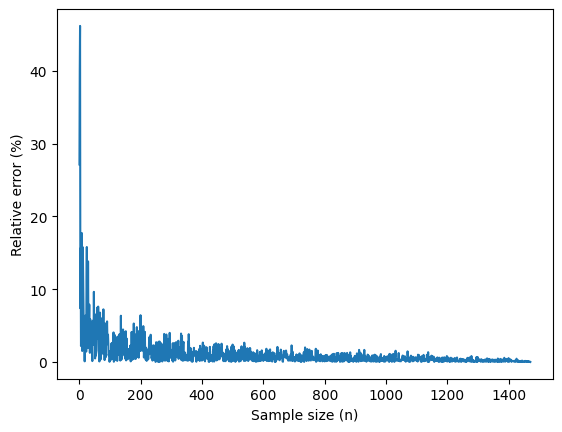

In [ ]:
population_mean = attrition_pop["HourlyRate"].mean()
sample_mean = []
n = []
for i in range(len(attrition_pop["HourlyRate"])):
    sample_mean.append(attrition_pop.sample(n=i+1)["HourlyRate"].mean())
    n.append(i+1)

#Turn sample_mean into a numpy array
sample_mean = np.array(sample_mean)

#Calculate the relative error (%)
rel_error_pct = 100 * abs(population_mean-sample_mean)/population_mean

plt.plot(n, rel_error_pct)
plt.xlabel("Sample size (n)")
plt.ylabel("Relative error (%)")
plt.show()

## Sampling distribution

Each time you perform a simple random sampling, you will obtain different values for your statistics.

In this example, the sample mean is different each time you repeat the sampling process.

A distribution of replicates of sample means (or other point estimates, is known as a sampling distribution)

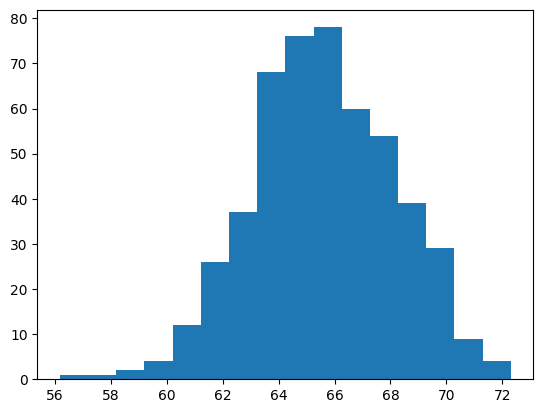

In [ ]:
mean_hourlyrate = []

for i in range(500):
    mean_hourlyrate.append(
        attrition_pop.sample(n=60)["HourlyRate"].mean()
    )

plt.hist(mean_hourlyrate, bins=16)
plt.show()

### Approximating sampling distributions

Sometimes it is computationally imposible to calculate statistics based on a population because it is huge. In those cases, instead of considering all the population, you just take a sample.

In this case, let's consider the mean value obtained from roll

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


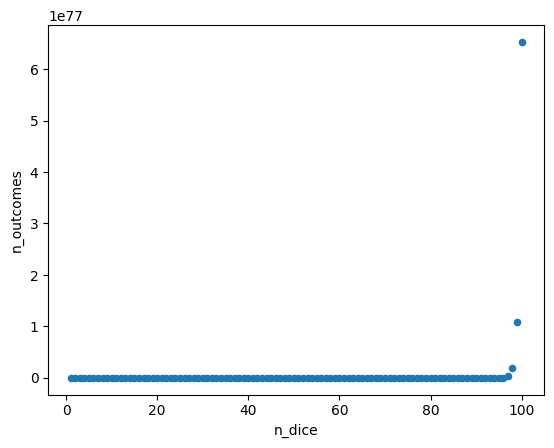

In [ ]:
n_dice = list(range(1, 101))
n_outcomes = []

for n in n_dice:
    n_outcomes.append(6**n)

outcomes = pd.DataFrame(
    {
        "n_dice" : n_dice,
        "n_outcomes" : n_outcomes
    }
)

outcomes.plot(
    x = "n_dice",
    y = "n_outcomes",
    kind = "scatter"
)
plt.show()

# Bootstrapping

## Concept

When you have a dataset, which clearly doesn't represent the hold population. You can treat the dataset as a sample and use it to build a theoretical population. ***this is possible by using a resampling technique whith replacement***

Example:

Let's use the coffee rating dataset. This dataset contains information about professional ratings for different brands of coffees coming from many countries.

Let's suposse

In [ ]:
coffee_ratings = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv"
)

Let's use just three columns to make it simple (*and store the indexes*)

In [ ]:
coffee_focus = coffee_ratings[["variety", "country_of_origin", "flavor"]].reset_index()

and now let's take a sample

In [ ]:
coffee_resamp = coffee_focus.sample(frac=1, replace=True)

#frac=1 makes the sample size as big as the dataset

Now see that there are some repeated values, and some others were not even sampled

In [ ]:
coffee_resamp["index"].value_counts()

822     5
906     5
809     5
1235    5
1284    4
       ..
537     1
539     1
541     1
542     1
1337    1
Name: index, Length: 850, dtype: int64

How many records didn't end up in the resample dataset?

In [ ]:
len(coffee_ratings) - len(coffee_resamp.drop_duplicates(subset="index"))

489

☝️☝️☝️☝️ this is the amount of samples that didn't end up in the resample (for this random resample)

Now, what if we extract the ***mean of this resample***, it would be

In [ ]:
np.mean(coffee_resamp["flavor"])

7.514794622852876

### Actually Bootstrapping

AND NOW LET'S REPEAT THIS PROCESS 1000 TIMES AND SAVE THE MEAN VALUES THAT WE GET FOR EACH RESAMPLE

AND THEN LET'S PLOT THAT TO SEE WHAT HAPPENS

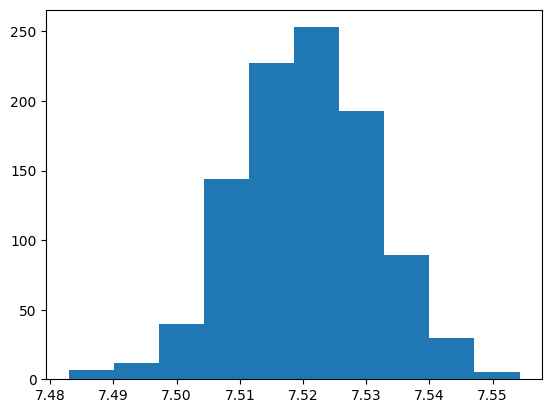

In [ ]:
means = []

for i in range(1000):
    means.append(
        np.mean(
            coffee_focus.sample(frac=1, replace=True)["flavor"]
        )
    )

plt.hist(means)
plt.show()

***What we have calculated is known as the Bootstrap distribution for the sample mean***

1. Make a resample of the same size as the original sample
2. Calculate the statistic of interest for this bootstrap sample
3. PUT THAT INTO A FOR TO DO IT A LOT OF TIMES

The resulting statistics are *bootstrap statistics* and they form *a bootstrap distribution*

## Bootstrap statistics to estimate population parameters

You can extract two main statistics from the bootstrap distribution

**Mean**

**Standard deviation**

### Mean

- Tipically, the bootstrap mean ***will be almost identical*** to the sample mean

- The sample mean ***is not neccesarily similar*** to the population mean

- Therefore, ***the bootstrap mean is not a good estimation of the population mean***

### Standard Deviation

The standard deviation of the bootstrap distribution (AKA standard error) is very useful to estimate the population standard deviation

$Population std.dev \approx Std.Error * \sqrt{n}$

In [ ]:
# Population Standard deviation
coffee_ratings["flavor"].std(ddof=0)

0.3982932757401295

In [ ]:
# Sample Standard deviation
coffee_sample = coffee_ratings["flavor"].sample(n=500, replace=False)

coffee_sample.std()

0.33832690787637093

In [ ]:
# Estimated population stantard deviation

# 1. Bootstrapping the sample

bootstrapped_means = []

for i in range(5000):
    bootstrapped_means.append(
        np.mean(coffee_sample.sample(frac=1, replace=True))
    )

# 2. Calculating standard error

standard_error = np.std(bootstrapped_means, ddof=1)        # ddof=1 because it's a sample std

# 3. Calculating n
n = len(coffee_sample)

# 4, population stantard deviation = to std_error * sqrt(n)
standard_error * np.sqrt(n)

0.3365273584545509

### Bootstrapping vs sampling distribution to estimate the mean

#### simple random sample

In [ ]:
spotify_population = pd.read_feather("spotify_2000_2020.feather")

spotify_sample = spotify_population.sample(n=10000)

##### sampling distribution

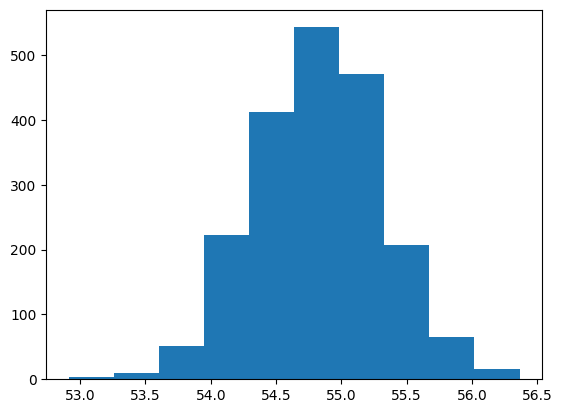

In [ ]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	spotify_population["popularity"].sample(n=500).mean()
    )

# Print the sampling distribution results
plt.hist(mean_popularity_2000_samp)
plt.show()



##### bootstrap distribution

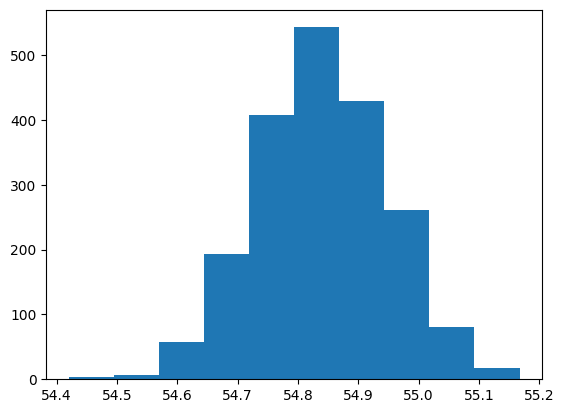

In [ ]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	spotify_sample["popularity"].sample(frac=1, replace=True).mean()
    )

# Print the bootstrap distribution results
plt.hist(mean_popularity_2000_boot)
plt.show()

In [ ]:
# Calculate the population mean popularity
pop_mean = spotify_population["popularity"].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample["popularity"].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.8411, 54.824535000000004, 54.8397755]


In [ ]:
dist_media_muestral = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    dist_media_muestral.append(
    	# Sample 500 rows and calculate the mean popularity 
    	coffee_ratings["flavor"].sample(n=500).mean()
    )

np.std(dist_media_muestral, ddof=1) * np.sqrt(500)


0.3169816193457466

In [ ]:
# Population Standard deviation
coffee_ratings["flavor"].std(ddof=0)

0.3982932757401295

# Confidence intervals

Confidence intervals define a range within the parameter or an statistic should be with a given certainty percentage.

Given a dataset, there are two ways of calculating confidence intervals (tipically 95%)

- Search from 2.5% to 97.5% of the dataset **(Quantile method)**
- Use the inverse of the cumulative density function and adjust it's parameters **(standard error method)**


## Quantile method for confidence intervals

To provide a 95% confidence interval for the normal distribution. We take the data contained within the 2.5 and 97.5 quantiles

![Picture title](image-20230209-211411.png)

Let's do an example with the standard normal distribution.







In [ ]:
# Generating a standard normal distribution

standard_normal = np.random.normal(0,1,1000000)

for the normal standard distribution:

%P(X $\geq$ -1.96) = 0.025 = 2.5%

In [ ]:
np.quantile(standard_normal, 0.025)

-1.9557793224830742

for the normal standard distribution:

%P(X $\leq$ 1.96) = 0.975 = 97.5%

In [ ]:
np.quantile(standard_normal, 0.975)

1.9647666250156202

## standard error method for confidence intervals

This method uses the Inverse Cumulative Distribution Function

First, let's remember the Cumulative Distribution Function for a normal standard distribution

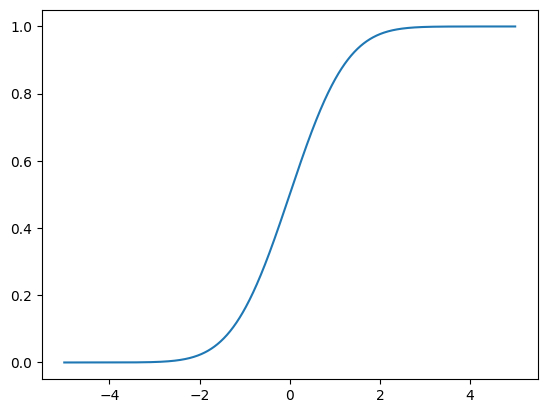

In [ ]:
cumulative_density_function = []

for i in np.linspace(-5, 5, 1001):
    cumulative_density_function.append(norm.cdf(i, loc=0, scale=1))

plt.plot(np.linspace(-5, 5, 1001), cumulative_density_function)
plt.show()

Now, if you flip the x and y axis, you obtain the ***inverse of the cumulative density function***

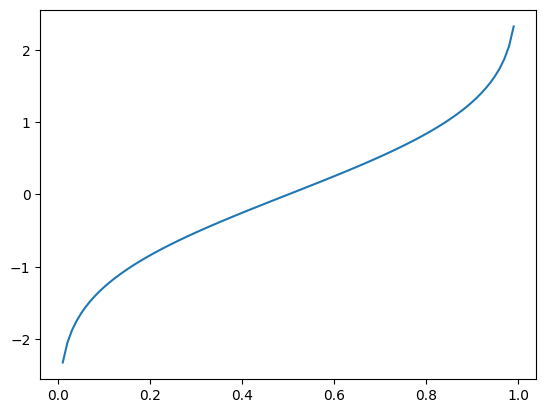

In [ ]:
inverse_cumulative_density_function = []

for i in np.linspace(-5, 5, 1001):
    inverse_cumulative_density_function.append(norm.ppf(i, loc=0, scale=1))

plt.plot(np.linspace(-5, 5, 1001), inverse_cumulative_density_function)
plt.show()

In [ ]:
norm.ppf(0.025, loc= 0, scale=1)

-1.9599639845400545

the method consists of:

1. Calculate the **point estimate**:
Which is the mean of the bootstrap distribution.

2. Calculate the **standard error**:
Which is the standard deviation of the bootstrap distribution

3. Use the **Inverse of the cumulative density function**:
Finally, call the norm.ppf() using the paramers
- the mean should be the **point estimate** of your distribution
- the standard deviation must be the **standard error** of your distribution

**sources:**

Datacamp: Sampling in python
Platzi: Estadistica Inferencial

# Hypotesis testing

## Concept

HYPOTHESIS TESTS DETERMINE WETHER THE SAMPLE STATISTICS LIE IN THE TAILS OF THE NULL DISTRIBUION

NULL DISTRIBUION: distribution of the statistic if the null hypothesis was true.

There are three types of tests. And the phrasing of the alternative hypothesis determines which type we should use

- If we are checking for a ***difference compared to a hypothesized value***, we look for ***extreme values in either tail*** and perform a ***two-tailed test***
- If the ***alternative hypothesis*** ($H_1$) uses language like ***"less" or "fewer"***, we perform a left tailed test
- If the ***alternative hypothesis*** ($H_1$) uses language like ***"greater" or "exceeds"***, correspond to a right tailed test

![Picture title](image-20230215-112430.png)

## Assumptions

Every hypothesis has the following assumptions:

- ***each sample is randomly sourced from its population***

this assumption exists because ***if the sample is not random, then it won't be representative of the population***

- ***each observation is independent***

the only exception for this rule is the paired t-test (section 7) just because the data measures the same observation at a different time.

the fact than observations are dependent or independent change the calculations, not accounting for dependencies when they exist results in an increased chance of false negative or false positive error. Also, not accounting for dependencies is a problem hard to detect, and ideally needs to be discussed before data collection

to verify this assumption, you have to know your data source, there are no statistical tests to verify this assumption. The best way to onboard this problem is to ask people involved in the data collection, or a domain expert that understands the population being sampled.

- ***large sample size***

These tests also assume that the sample is big enough that the ***central limit theorem*** applies and we can assume that the ***sample distribution is normal***.

smaller samples incur greater uncertainty, implicating that central limith theorem does not apply and the sampling distributions might not be normally distributed

Also, the uncertainty generated by small sample means we get wider confidence intervals on the parameter we are trying to estimate

Now, ***How big our sample needs to be?*** depends on the test and will be shown across the upcoming chapters

- ***If the sample size is small***
In case of having small sample sizes not everything is lost, we can still work with them if the null distribution seems normal

## Sanity check

One more check we can perform is to calcuate a bootstrap distribution and visualize it with a histogram, if we don't see a bell shaped normal curve, then one of the assumptions hasn't been met, in that case revisit the data collection process and check for

- randomness
- independence
- sample size

# Hypothesis test (mean)

## Steps to perform hypothesis testing

### 1. Define the null hypothesis and alternative hypothesis

### 2. Calculate the Z-score

since variables have arbitrary units and ranges, before we test our hypotesis, we need to standardize the values:

$standardizedvalue = \frac{value - mean}{standard deviation}$

But for hypotesis testing, we use a variation

z_score = $\frac{sample statistic - hypoth.param.value}{standard error}$

note:

**sample statistic:** is the statistic taken from your dataset or from the information you have

**hypothesis parameter value:** is the parameter that you define in your alternative hypothesis $H_1$

**standard error:** is the standard deviation of the bootstrap distribution

### 3. Calculate the P-value

Once you get the Z-score, you can now calculate the P-value. The calculation of the P-value depends on the test that you are performing

- **for left-tailed test**

p_value = norm.cdf(z_score, loc=0, scale=1)

- **for right-tailed test**

p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

- **for two-tailed test**

p_value = 2 * norm.cdf(z_score, loc=0, scale=1)

- Note:
*norm.cdf() is a function of the scipy.stats library*

*to run it properly, run: **from scipy.stats import norm***

##### ***Finally, if the p-value is less than 0.05 (for a 0.05 significance level), you can reject the null hypothesis. Otherwise, you fail to reject the null hypothesis***

## Example1.  TWO TAILED TEST

### context

The dataset below contains information about the stack overflow yearly survey filtered to get answers only from people who consider theirselves as data scientist.

In [2]:
stack_overflow = pd.read_feather("stack_overflow.feather")

stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


Let's hypothesize that ***the mean anual compensation of the population of data scientists is 110.000 dollars***

- $H_0$ : The mean anual compensation of the population of data scientists is different from 110.000 dollars

- $H_1$ : The mean anual compensation of the population of data scientists is 110.000 dollars

In [4]:
stack_overflow["converted_comp"].mean()

119574.71738168952

The result is different from our hypotesis, but, ***is it meaningfully different?***

To answer that, we generate a bootstrap distribution of sample means

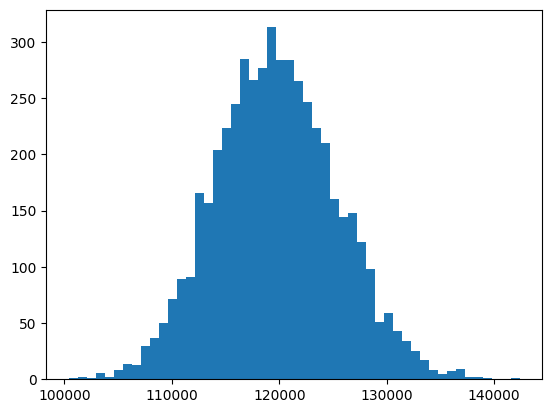

In [5]:
so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        np.mean(
            stack_overflow.sample(frac=1, replace=True)["converted_comp"]
        )
    )

plt.hist(so_boot_distn, bins=50)
plt.show()

Notice that 110.000 is on the left of the distribution

Now, if we calculate the standard error (a.k.a standard deviation of the bootstrap distribution):

In [6]:
np.std(so_boot_distn, ddof=1)

5671.35937802767

since variables have arbitrary units and ranges, before we test our hypotesis, we need to standardize the values:

$standardizedvalue = \frac{value - mean}{standard deviation}$

But for hypotesis testing, we use a variation

$z = \frac{sample statistic - hypoth.param.value}{standard error}$

***the result is called Z score***

### Calculating Z-score

In [7]:
z_score = ( stack_overflow["converted_comp"].mean() - 110000 ) / np.std(so_boot_distn, ddof=1)

z_score

1.6882579190422111

### Calculating P-value

Since this is a two-tailed test, the pvalue is:

***p_value = norm.cdf(z_score, loc=0, scale=1) * 2***

In [9]:
p_value =  2 * ( 1 - norm.cdf(z_score, loc=0, scale=1) )

p_value

0.09136172933530817

And with this p-value and a significance level of 0.05, we failed to reject the null hypothesis and can conclude that the ***mean anual compensation of the population of data scientists is different from 110.000 dollars***

## Example2. RIGHT TAILED TEST

### context

For this example, we will use the same dataframe of the stackoverflow survey for data scientists.

The variable *age_first_code_cut* classifies when Stack Overflow user first started programming

- "adult" means they started at 14 or older
- "child" means they started before 14

Let's perform a hypothesis testing

- $H_0$ : The proportion of data scientists starting programming as children is 35%

- $H_1$ : The proportion of data scientists starting programming as children is greater than 35%

In [ ]:
stack_overflow["age_first_code_cut"].head()

0    adult
1    child
2    child
3    adult
4    adult
Name: age_first_code_cut, dtype: object

We initially assume that the null hypothesis $H_0$ is true. This only changes if the sample provides enough evidence to reject it.

Now let's calculate the Zscore

### Calculating Z score

In [ ]:
# Point estimate
prop_child_samp = (stack_overflow["age_first_code_cut"] == "child").mean()
prop_child_samp

0.39141972578505085

In [ ]:
# hypothesized statistic
prop_child_hyp = 0.35

In [ ]:
# std_error
first_code_boot_distn = []

# bootstrap distribution
for i in range (5000):
    first_code_boot_distn.append(
        (stack_overflow.sample(frac=1, replace=True)["age_first_code_cut"] == "child").mean()
    )

std_error = np.std(first_code_boot_distn, ddof = 1)

std_error

0.0104640957859478

In [ ]:
# Z-score

z_score = (prop_child_samp - prop_child_hyp) / std_error

z_score

3.958270894335017

### Calculating P-value

Now, pass the z-score to the standard normal CDF (cumulative density function for standard normal distribution)

In [ ]:
norm.cdf(z_score, loc=0, scale=1)

0.9999622528463471

And for final, as we are performing a right tail test, the P-value is calculated by taking 

$1 - norm.cdf()$

In [ ]:
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

p_value

3.77471536529006e-05

Therefore with a significance level of 0.05, we reject the null hypothesis and we can state that

***The proportion of data scientists starting programming as children is greater than 35%***

## Example 3: RIGHT TAILED TEST

### context

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late.

In [3]:
late_shipments = pd.read_feather("late_shipments.feather")

late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


***1. Calculate the proportion of late shipments***

In [ ]:
prop = (late_shipments["late"] == "Yes").mean()

prop

0.061

So, now we know that 0.061 or 6.1% of the sipments were late.

***Let's hipothesize that the proportion of late shipments is 6%***

- $H_0$: The proportion of late shipments is 6%
- $H_1$: The proportion of late shipments is greater that 6%

and calculate a z score based on that hypothesis

### Calculating Z score

In [ ]:
late_shipments_boot_distn = []

# bootstrap distribution
for i in range (5000):
    late_shipments_boot_distn.append(
        (late_shipments.sample(frac=1, replace=True)["late"] == "Yes").mean()
    )

# standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

In [ ]:
# remember: 
# z_score = (sample statistc - hypothesized statistic) / standard error

z_score = (prop - 0.06) / std_error

z_score

0.1318317224271221

And we got a z score of 0.13.

Now let's calculate the pvalue

### Calculating P-value

In [ ]:
# Remember
# For right tailed test, p_value = 1 - norm.cdf(...)

p_value = 1 - norm.cdf(z_score, loc = 0, scale = 1)

p_value

0.4475586973291411

Since the P-value is greater that 0.05, at a significance level of 0.05, we failed to reject the null hypothesis and the conclusion is: The proportion of late shipments is not greater than 6%

### Confirming the results with a confidence interval

Let's calculate a confidence interval of 95%


In [ ]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.076)


Note:

Since 0.06 is included in the 95% confidence interval and we failed to reject due to a large p-value, the results are similar.

# Hypothesis test (difference of means)

## Assumptions for sample size

These tests fall in the category of ***Two-sample t-tests***, and we need ***at least 30 observations in each sample*** to fulfill the assumption

$n_1 \geq 30, n_2 \geq 30$

$n_i$: sample size for group $i$

## Example 1. Difference of means (right tailed)

### Context

The dataset below contains information about the stack overflow yearly survey filtered to get answers only from people who consider theirselves as data scientist.

In [ ]:
stack_overflow = pd.read_feather("stack_overflow.feather")

stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


Two-sample problems compares sample statistics across groups of a variable

for the stack_overflow dataset:

- ***converted_comp*** is a numerical variable: describes mean salary in USD
- ***age_first_code_cut*** is a categorical value: describes if people started programming as childs or adults

The Hypothesis question is:

***Are those users who first programmed as childs better compensated than those that started as adults?***

$H_0 : $  Population mean for both groups is the same
$H_1 : $  Population mean for those who started as childs is greater that for adults

$H_0 : \mu_{child} - \mu_{adult} = 0 $

$H_1 : \mu_{child} - \mu_{adult} > 0 $

***Use a significance level of 0.05***

In [ ]:
stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

The difference is notorius. But, ***is that increase statistically significant?*** or could it be explained by sampling variability?

### Calculating T statistic

In this case, the ***test statistic*** for the hypothesis test is $\bar{x}_{child} - \bar{x}_{adult}$, but in this case you don't calculate the ***Z-score*** but the ***T stastictic***

$t = \frac{(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child} - \mu_{adult})}{SE(\bar{x}_{child} - \bar{x}_{adult})} $

and

$SE(\bar{x}_{child} - \bar{x}_{adult}) \approx \sqrt{\frac{s^2_{child}}{n_{child}}+ \frac{s^2_{adult}}{n_{adult}}}$ 

Now, since the null hypothesis assumes that the population means are equal, the final equation for t would be:

$t = \frac{(\bar{x}_{child} - \bar{x}_{adult})}{\sqrt{\frac{s^2_{child}}{n_{child}}+ \frac{s^2_{adult}}{n_{adult}}}}$

In [ ]:
xbar = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()
xbar_child = xbar[1]
xbar_adult = xbar[0]

s = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std()
s_child = s[1]
s_adult = s[0]

n = stack_overflow.groupby("age_first_code_cut")["converted_comp"].count()
n_child = n[1]
n_adult = n[0]

In [ ]:
numerator = xbar_child - xbar_adult

denominator = np.sqrt( ((s_child**2)/n_child) + ((s_adult**2)/n_adult ) )

t_stat = numerator/denominator

t_stat

1.8699313316221844

### Calculating P value

The t distribution requests a degrees of freedom parameter (degrees of freedom are the amount of independant observations in our dataset).

In this case, ***there are as many degrees of freedom as observations***, minus two, because we already know two sample statistics (the means for each group)


In [ ]:
# dof = n - 2 
degrees_of_freedom = n_child + n_adult - 2

# since it is a right tailed test
P_value = 1 - t.cdf(t_stat, df=degrees_of_freedom)

P_value

0.030811302165157595

Since the P-value is less than 0.05, we reject the null hypothesis and can conclude that ***the mean salary for people who started coding as child, is higher than the mean salary for those who started as adults***

### Solving with pengouin

In [ ]:
# Child compensation
child_compensation = stack_overflow[
    stack_overflow["age_first_code_cut"] == "child"]["converted_comp"]

# Adult compensation
adult_compensation = stack_overflow[
    stack_overflow["age_first_code_cut"] == "adult"]["converted_comp"]

pingouin.ttest(
    x = child_compensation,
    y = adult_compensation,
    alternative="greater"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.869931,1966.979249,greater,0.030821,"[2531.75, inf]",0.079522,0.549,0.579301


## Example 2. Difference of means (left tailed)

### Context

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The **late** column denotes whether or not the part was delivered late.

In [22]:
late_shipments = pd.read_feather("late_shipments.feather")

late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. 

the **weight_kilograms** variable contains information about the weight of each shipment.

Then the hypothesis would be

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.
-> $H_0: \mu_{late} = \mu_{on time}$
-> $H_0: \mu_{late} - \mu_{on time} = 0$

$H_1$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.
-> $H_1: \mu_{on time} < \mu_{late} $
-> $H_1: \mu_{on time} - \mu_{late} < 0$

### Calculating T statistic

In [ ]:
xbar = late_shipments.groupby("late")["weight_kilograms"].mean()
xbar_no = xbar[0]
xbar_yes = xbar[1]

s = late_shipments.groupby("late")["weight_kilograms"].std()
s_no = s[0]
s_yes = s[1]

n = late_shipments.groupby("late")["weight_kilograms"].count()
n_no = n[0]
n_yes = n[1]

In [ ]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt( ((s_no**2)/n_no) + ((s_yes**2)/n_yes) )

# Calculate the test statistic
t_stat = numerator/denominator

t_stat

-2.3936661778766433

### Calculating P-value

In [ ]:
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df = degrees_of_freedom)

p_value

0.008432382146249523

In fact, we can now reject the null hypothesis and conclude that the mean weight for those shipments that were delivered late is higher

# Hypothesis testing (paired data)

## Assumptions for sample size

This tests falls into the category of ***paired-sample t-tests*** and the assumptions for this category are that we have ***at least 30 pairs of observations across the samples***

No. of rows in our data $\geq 30$



## Example 1. Difference of means (left tailed)

### Context

The dataset below, refers to the results for republicans in 2008 and 2012 presidential elections, each row represents a republicans result for presidential elections at a county level

In [ ]:
republicans = pd.read_feather("repub_votes_potus_08_12.feather")

republicans

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812
...,...,...,...,...,...
95,Wisconsin,Burnett,48.342541,52.437478,-4.094937
96,Wisconsin,La Crosse,37.490904,40.577038,-3.086134
97,Wisconsin,Lafayette,38.104967,41.675050,-3.570083
98,Wyoming,Weston,76.684241,83.983328,-7.299087


Given this dataset, the question is:

Was the percentage of republican candidate votes ***lower in 2008 than in 2012?***

$H_{0}: \mu_{2008} - \mu_{2012} = 0$

$H_{1}: \mu_{2008} - \mu_{2012} < 0$

let´s use a significance level of 0.05

One detail of this dataset is that 2008 and 2012 votes are ***paired*** meaning they are ***not independant***

and we want to capture voting patterns in the model

now, for paired analysis, rather than considering the two variables separatedly, we can consider a single variable of the difference. Let´s store that difference in a dataframe called ***sample_data*** and the variable called ***diff***

<AxesSubplot: >

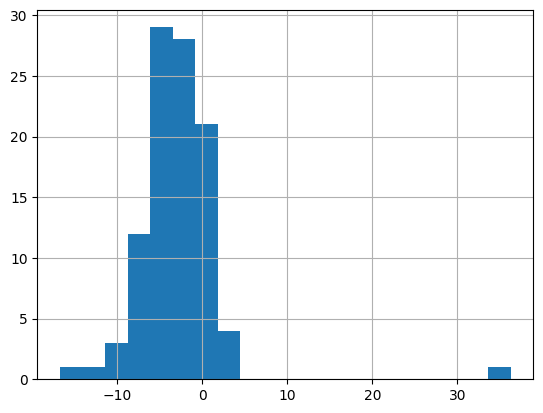

In [ ]:
sample_data = republicans

sample_data["diff"] = sample_data["repub_percent_08"] - sample_data["repub_percent_12"]

sample_data["diff"].hist(bins=20)

in the histogram, you can notice that most values are between -10 and 0, including an outlier

now let´s calculate the ***sample mean***

In [ ]:
xbar_diff = sample_data["diff"].mean()

xbar_diff

-2.877109041242944

now, we can restate the hypothesis in terms of $\mu_{diff}$

$H_{0}: \mu_{diff} = 0$

$H_{1}: \mu_{diff} < 0$



### Calculating T statistic

the t statistic in this case has a slightly variation, the equation in this case would be

$t = \frac{\bar{x}_{diff} - \mu_{diff}}{\sqrt{\frac{s^2_{diff}}{n_{diff}}}}$

and also, in this case we know one statistic. Then, the numbers of degrees of freedoms would be the number of records minus one

dof = ndiff - 1

In [ ]:
# calculating t

n_diff = len(sample_data)

s_diff = sample_data["diff"].std()

t_stat = (xbar_diff - 0)/np.sqrt((s_diff**2)/n_diff)

t_stat

-5.601043121928489

### Calculating P value

In [ ]:
p_value = t.cdf(t_stat, df = n_diff-1)

p_value

9.572537285272411e-08

This means we can reject the null hypothesis and can conclude that the percentage of votes for republicans was lower in 2008 compared to 2012.

### solving with pingouin

The pingouin package provides methods for hypothesis testing and provides an output as a pandas dataframe.

The method that we will use is ttest

- The first argument is the series of differences
- The argument y specifies the hypothesized difference value from the null hypothesis (in this case is zero)
- The alternative hypothesis can be specified as "two-sided" for two tailed tests, "less" for left tailed tests or "greater" for right tailed tests 

In [ ]:
pingouin.ttest(
    x = sample_data["diff"],
    y = 0,
    alternative = "less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


And you can see that the result is the same, null hypothesis is rejected

### pingouin variation of t-test for paired data

pingouin offers a variation that requires even less work, which is useful for paired data

In [ ]:
pingouin.ttest(
    x = sample_data["repub_percent_08"],
    y = sample_data["repub_percent_12"],
    paired = True,    #this argument is very important for paired data
    alternative="less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


## Example 2. Difference of means (two-tailed)

### Context

The dataset below, refers to the results for democrats in 2012 and 2016 presidential elections, each row represents democrats result for presidential elections at a county level

In [ ]:
democrats = pd.read_feather("dem_votes_potus_12_16.feather")

democrats.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

$H_0$ : The proportion of democratic votes in 2012 and 2016 were the same.
$H_1$ : The proportion of democratic votes in 2012 and 2016 were different.

### Solving with pingouin

In [ ]:
pingouin.ttest(
    x = democrats['dem_percent_12'],
    y = democrats['dem_percent_16'],
    paired = True,
    alternative = "two-sided"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


then, you can reject the null hypothesis

# Hypothesis test (ANOVA)

## Assumptions for sample size

Since ANOVA compares a numerical value across multiple categories (three or more), we need ***at least 30 observations in each sample*** to fulfill the assumption

$n_i \geq 30$ for all values of $i$

## When to use ANOVA

ANOVA tests are used when you want to compare the behavior of a numerical variable between three or more groups

let's analyze two variables from the stack_overflow dataset

- ***job_sat:*** describes how satisfied are people with their jobs
- ***converted_comp*** shows compensation in USD

In [ ]:
stack_overflow = pd.read_feather("stack_overflow.feather")

stack_overflow[["job_sat", "converted_comp"]].head()

,job_sat,converted_comp
0,Slightly satisfied,77556.0
1,Very satisfied,74970.0
2,Very satisfied,594539.0
3,Very satisfied,2000000.0
4,Very satisfied,37816.0


A hypothesis question could be:

Is compensation different across the levels of satisfaction?

The first step is to visualize it in a boxplot

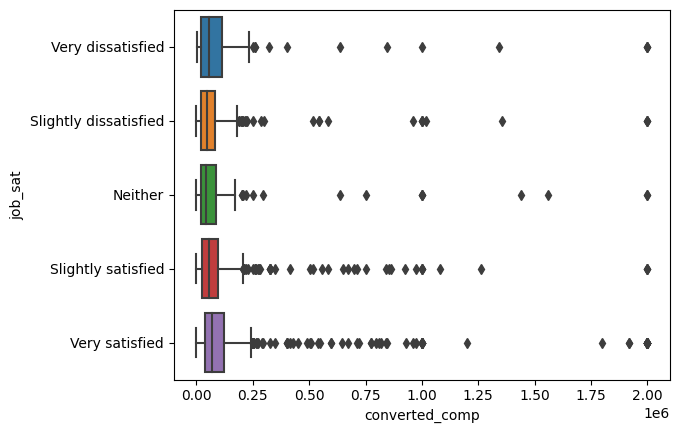

In [ ]:
sns.boxplot(
    x = stack_overflow["converted_comp"],
    y = stack_overflow["job_sat"],
    data = stack_overflow
)

plt.show()

And it looks nice, but let's remove the outliers to see the distribution better

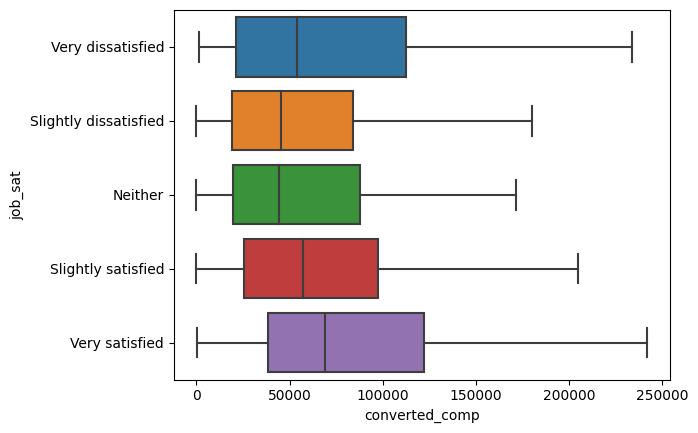

In [ ]:
sns.boxplot(
    x = stack_overflow["converted_comp"],
    y = stack_overflow["job_sat"],
    data = stack_overflow,
    showfliers = False
)

plt.show()

And looks like there are differences, but are these statistically significant?

Let's test it using the ***pingouin.anova method***, using a ***significance level of 0.2***

## pingouin.anova() method

In [ ]:
pingouin.anova(
    data = stack_overflow,
    dv = "converted_comp",              #Dependant Variable
    between= "job_sat"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


This p-value is 0.0013, which is less than 0.2, that indicates that at least two categories of ***job satisfaction*** have significant differences between their compensation levels

***BUT THIS DOESN'T TELL US WHICH TWO CATEGORIES THEY ARE***

to identify which categories are different, you have to compare all the categories as shown below:

![Picture title](image-20230220-080955.png)

## pairwise tests

To do this, let's use a pairwise test

*notice that the three first arguments are the same as ANOVA test, we will discuss the p-adjust shortly*

In [ ]:
pingouin.pairwise_tests(
    data = stack_overflow,
    dv = "converted_comp",
    between= "job_sat",
    padjust= "none"
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


If we analyze the output, in the p-unc column, we will notice that ***three of them are less than our significance level of 0.2***

Note that for pairwise tests, as the number of groups increase, the number of pairs increase cuadratically (in this case we got 10 pairs out of 5 groups)

<img src="image-20230220-082222.png"  width="500" height="300">

### false positive danger

And if the pairs increases cuadratically, the number of hypothesis tests we must perform increases cuadratically.

Now, performing a lot of hypothesis tests increase the ***probability of getting a false positive*** significant result, the chart below shows the probability of a false positive vs the amount of hypothesis tests ran

![Picture title](image-20230220-083226.png)

Note that:

- with a significance level of 0.2, running one test, the probability of a false positive is approximately 0.2!

- with 5 groups (which means 10 tests), the probability of false positive is around 0.7!

- with 20 groups, it's almost guaranteed that you will have at least one false positive!

***The solution to this problem***

The solution for this problem of getting a false positive is to apply an adjustment to increase the p-values (and therefore reducing the probability of false positive)

- one common adjustment is the bonferroni correction

### p -value adjustment (bonferroni)

In [ ]:
pingouin.pairwise_tests(
    data = stack_overflow,
    dv = "converted_comp",
    between= "job_sat",
    padjust= "bonf"
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


Now, if we analyze the p-corr column, which is the adjusted p-value, we will note that only two of the pairs have an statistically significant difference

Great! p-value adjustment is the solution for when you have a ton of pairs!

pingouin offers many other options for adjusting the p-values, some are more conservative than others.

<img src="image-20230220-084003.png"  width="400">


## Example 2 ANOVA (three categories)

Given the late shipments data, let's analyze how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

In [ ]:
late_shipments = pd.read_feather("late_shipments.feather")

late_shipments[["shipment_mode", "pack_price"]].head()

,shipment_mode,pack_price
0,Air,89.00
1,Air,32.00
2,Air,4.80
3,Ocean,2.37
4,Air,0.01


$H_0$: Pack prices for every category of shipment mode are the same.

$H_1$: Pack prices for some categories of shipment mode are different.

$\alpha = 0.1$

### Checking sample size assumptions

In [12]:
# Count the shipment_mode values
counts = late_shipments["shipment_mode"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            905
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


The assumptions are not met for that Air Charter category, therefore, we should be a little cautious of the results given that small sample size.

### Exploratory Data Analysis per Group

let's explore first with the average price for each group

In [ ]:
late_shipments.groupby("shipment_mode")["pack_price"].mean()

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64

Looks like the air is way more expensive than the other two categories

let's see the dispersion as well:

In [ ]:
late_shipments.groupby("shipment_mode")['pack_price'].std()

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64

data for "air" is more dispersed

Now let's see the boxplots:

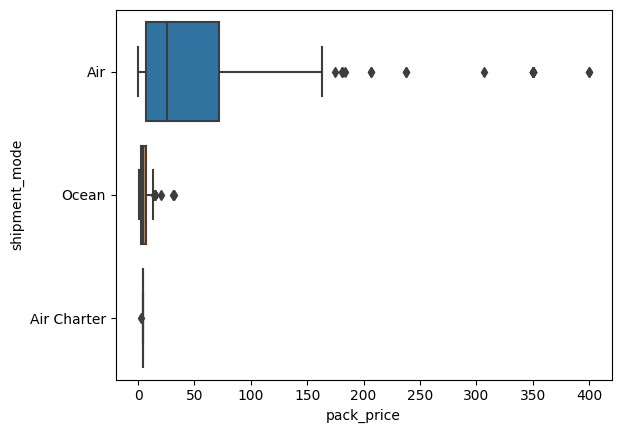

In [ ]:
sns.boxplot(
    x = late_shipments["pack_price"],
    y = late_shipments["shipment_mode"],
    data = late_shipments
)
plt.show()

Great, now let's see if this difference statistically significant

### Conducting ANOVA

In [ ]:
pingouin.anova(
    data = late_shipments,
    dv = "pack_price",              #Dependant Variable
    between= "shipment_mode"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.8646,5.089479e-10,0.042018


the p-unc (p value) indicates that there is difference between at least one pair, let's perform pairwise tests to confirm which pairs are these

### Pairwise tests

In [ ]:
pingouin.pairwise_tests(
    data = late_shipments,
    dv = "pack_price",
    between = "shipment_mode"
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


without adjustment, the p value in each test indicates that there is a significant difference between all the pairs, let's see the results again with the adjustment

### P-value adjustment (bonferroni)

In [ ]:
pingouin.pairwise_tests(
    data = late_shipments,
    dv = "pack_price",
    between = "shipment_mode",
    padjust = "bonf"
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


adjusted p-value shows similar results, all the p-values are smaller than 0.1!

then we can conclude:

for the pairs below, we can reject the null hypothesis that the pack prices are equal:

- $\mu_{air} > \mu_{air-charter}$
- $\mu_{air} > \mu_{ocean}$
- $\mu_{ocean} >\mu_{air-charter}$

# Hypothesis test (tests for proportions)

when you refer to hypothesis tests for proportions, 

$p$ is the population proportion (unknown parameter)

$\hat{p}$ is the sample proportion (sample statistic)

$p_0$ is the hypothesized population proportion

Now, when performing the hypothesis testing, the test statistic is:

$z = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 * (1 - p_0)}{n}}}$



## Assumptions for sample size 

Since this is a ***one-sample proportion test***, the number of successes and the number of failures in sample is greater than or equal to 10

$n * \hat{p} \geq 10$

$n * (1 - \hat{p}) \geq 10$

$n$: sample size
$\hat{p}$: proportion of successes in sample

## Example 1 (two-tailed test)

### Context

Returning to the stack overflow survey, let's hypothesize that half of the users are under thirty

$H_0$ : Proportions of stackoverflow users under thirty = 0.5

$H_1$ : Proportions of stackoverflow users under thirty $\neq$ 0.5

$\alpha$ = 0.01

let's check the sample first

In [ ]:
stack_overflow["age_cat"].value_counts(normalize = True)

Under 30       0.535604
At least 30    0.464396
Name: age_cat, dtype: float64

given this information, let's check our hypothesis

### Calculate z score

In [ ]:
p_hat = (stack_overflow["age_cat"] == "Under 30").mean()

p_0 = 0.5

n = len(stack_overflow)

In [ ]:
z_score = (p_hat - p_0) / np.sqrt( (p_0 * (1 - p_0))/ n )

z_score

3.385911440783663

### Calculating p-value

In [ ]:
#substract from 1 since p-value is positive
p_value = 2 * (1 - norm.cdf(z_score)) 

p_value

0.0007094227368100725

Since the p_value is less than the alpha, then we can reject the null hypothesis

## Example 2 (right tailed test)

Given the late shipments dataset, let's Hypothesize that the proportion of late shipments is greater than 6%.

H_0 = proportion of late shipments is 6%.

H_1 = proportion of late shipments is greater than 6%.

In [2]:
late_shipments = pd.read_feather("late_shipments.feather")

### Checking for sample size assumptions

In [3]:
# Count the late values
counts = late_shipments["late"].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


Since there are more than 10 successes and failures, assumptions are fulfilled

### Calculating z-score

In [4]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

### Calculating p-value

In [5]:
# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


then, we failed to reject the null hypothesis

# Hypothesis test (tests for differences of proportions)

## Assumptions for sample size

Since this is a ***two-sample proportion test***, the number of successes and the number of failures in each sample is greater than or equal to 10

$n_1 * \hat{p}_1 \geq 10$
$n_2 * \hat{p}_2 \geq 10$

$n_1 * (1 - \hat{p}_1) \geq 10$
$n_2 * (1 - \hat{p}_2) \geq 10$

$n$: sample size
$\hat{p}$: proportion of successes in sample

## Example 1 (two-tailed)

### Context

In the stack overflow dataset, there is a variable called hobbyist

the value "yes" indicates that the users considers themselves as a  hobbyist and "no" indicates that they consider themselves as professionals

$H_0$: proportion of hobbyist users is the same for those under thirty as those at leats thirty
$H_0$: $p_{\geq 30} - p_{< 30} = 0 $

$H_1$: proportion of hobbyist users is different for those unnder thirty as those at leats thirty
$H_0$: $p_{\geq 30} - p_{< 30} \neq 0 $

$\alpha$ = 0.05

exploring the proportions between the age categories, we get:

In [4]:
stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize = True)

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

but, is it statistically significant?

### Calculating the Z score

![Picture title](image-20230221-085439.png)

In [5]:
p_hats = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize = True)

p_hats

age_cat      hobbyist
At least 30  Yes         0.773333
             No          0.226667
Under 30     Yes         0.843105
             No          0.156895
Name: hobbyist, dtype: float64

In [6]:
p_hat_at_least_30 = p_hats[("At least 30", "Yes")]

p_hat_under_30 = p_hats[("Under 30", "Yes")]

print(p_hat_at_least_30, p_hat_under_30)

0.7733333333333333 0.8431048720066061


In [7]:
n = stack_overflow.groupby("age_cat")["hobbyist"].count()

n

age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64

In [8]:
n_at_least_30 = n["At least 30"]

n_under_30 = n["Under 30"]

print(n_at_least_30, n_under_30)

1050 1211


In [9]:
# calculating p_hat

p_hat = (
    (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30)/
    (n_at_least_30 + n_under_30)
)

# calculating standard error
std_error = np.sqrt(p_hat * (1 - p_hat) / n_at_least_30 + 
                    p_hat * (1 - p_hat) / n_under_30)

# calculating z-score
z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error
z_score

-4.223691463320559

### Calculating p-value

In [10]:
# p-value for two sided test
2 * norm.cdf(z_score)

2.403330142685068e-05

Therefore, we can reject the null hypothesis

### Calculating with statsmodels

This function requires two arguments:

- the number of hobbyists in each category
- the total number of rows in each group

In [11]:
stack_overflow.groupby("age_cat")["hobbyist"].value_counts()

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [12]:
n_hobbyists = np.array([812, 1021])

n_hobbyists

array([ 812, 1021])

In [13]:
n_rows = np.array([812 + 238, 1021 + 190])

n_rows

array([1050, 1211])

In [15]:
from statsmodels.stats.proportion import proportions_ztest

z_score, p_value = proportions_ztest(count=n_hobbyists,
 nobs=n_rows, alternative="two-sided")

print(z_score, p_value)

-4.223691463320559 2.403330142685068e-05


the p-value is smaller than our alpha, meaning that we can reject the null hypothesis

## Example 2 (right tailed)

### Context

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the ***late*** column. Freight costs are stored in the ***freight_cost_group*** column, and the categories are "expensive" and "reasonable"

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are

$H_{0}: late_{expensive} - late_{reasonable} = 0$
$H_{1}: late_{expensive} - late_{reasonable} > 0$

In [18]:
p_hats = (
    late_shipments.
    groupby("freight_cost_groups")["late"].value_counts(normalize=True)
).filter(like='Yes', axis=0)

p_hats

freight_cost_groups  late
expensive            Yes     0.079096
reasonable           Yes     0.035165
Name: late, dtype: float64

In [19]:
# sample size
ns = late_shipments.groupby("freight_cost_groups")["late"].count()

ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

Now that we have the p hats and the n, let's calculate the p-hat

![Picture title](image-20230221-105843.png)

In [20]:
p_hat = (
    (p_hats["reasonable"] * ns["reasonable"] +
     p_hats["expensive"] * ns["expensive"]) / 
    (ns["reasonable"] + ns["expensive"])
)

p_hat

late
Yes    0.058824
Name: late, dtype: float64

now that we have the p_hat, let's calculate the standard error of the sample as follows:

![Picture title](image-20230221-122036.png)

In [21]:
# Calculate the standard error
std_error = np.sqrt(
    ( ( p_hat * (1 - p_hat) ) / ns["expensive"] )+
    ( ( p_hat * (1 - p_hat) ) / ns["reasonable"] )
)

std_error

late
Yes    0.015031
Name: late, dtype: float64

### Calculating Z score

In [22]:
z_score = (p_hats["expensive"] - p_hats["reasonable"])/std_error

z_score

late
Yes    2.922649
Name: late, dtype: float64

### Calculating p value

In [23]:
# Right tailed test
p_value = 1 - norm.cdf(z_score)

p_value

array([0.00173534])

With this p-value we can reject the null hypothesis and conclude that the proportion of late deliveries for expensive-priced shipments is greater than the proportion for reasonable-priced shipments 

### Calculating with statmodels

In [29]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = (
    late_shipments.groupby("freight_cost_groups")["late"].value_counts()
)

success_counts

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64

In [32]:
success_counts = np.array(
    [
        late_by_freight_cost_group[("expensive","Yes")],
        late_by_freight_cost_group[("reasonable","Yes")]
    ]
)

success_counts

array([42, 16])

In [31]:
n = np.array([
    late_by_freight_cost_group["expensive"].sum(),
    late_by_freight_cost_group["reasonable"].sum()
    ])

n

array([531, 455])

In [35]:
stat, p_value = proportions_ztest(
    count = success_counts,
    nobs = n,
    alternative = "larger"

)

print(stat, p_value)

2.922648567784529 0.001735340002359578


And we got the same results, same p-value!

# Chi Squared Tests of independance

## Assumptions for sample size

The number of successes and failures in each group is greater that or equal to 5

$n_1 * \hat{p}_i \geq 5$

$n_1 * (1 - \hat{p}_i) \geq 5$

$n_i$: sample size for group $i$

$\hat{p}$: proportion of successes in sample group $i$

## Example 1

This test measures the ***independance between two categorical variables***

Two categorical variables are statistically independant when the proportion of successes in the response variable is the same across all the categories of the explanatory variable

let's use the pingouin package to determine if the "hobbyist" and "age_cat" variables from the stack_overflow survey datasetare independant

$H_0 :$ Age categories are independent of hobbyist autoperception
$H_1 :$ Age categories are not independent of hobbyist autoperception

<AxesSubplot: xlabel='hobbyist'>

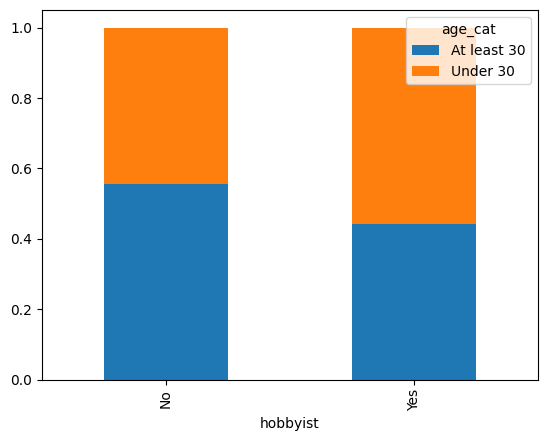

In [12]:
props = (
    stack_overflow
    .groupby("hobbyist")["age_cat"]
    .value_counts(normalize = True)
)

wide_props = props.unstack()

wide_props.plot(kind = "bar", stacked = True)

This chart may suggest that the variables are not indepentant, because looks like the proportion of hobbyists is higher in people under 30.

***Let's confirm if these variables are statistically independant***

***Calculating degrees of freedom***

in this case, there are two categorical variables with two categories each, then the degrees of freedom are calculated:

$dof =$ (No. of response categories - 1) x (No. of explanatory categories - 1)
$dof = (2-1)*(2-1) = 1$

***Yates' continuity correction***

Is a correction only applied when the ***sample size is very small*** and the ***degrees of freedom is one***. Carefull!, the only way to apply it is if $dof = 1$, otherwise, it won't be applied by default

In this case, since ***each group has over 1000 observations, we don't need it here***

In [15]:
expected, observed, stats = pingouin.chi2_independence(
    data = stack_overflow,
    x = "hobbyist",
    y = "age_cat",
    correction= False
)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,17.387820,1.0,0.000030,0.087694,0.986444
1,cressie-read,0.666667,17.366950,1.0,0.000031,0.087642,0.986357
2,log-likelihood,0.000000,17.351288,1.0,0.000031,0.087602,0.986291
3,freeman-tukey,-0.500000,17.362338,1.0,0.000031,0.087630,0.986338
4,mod-log-likelihood,-1.000000,17.392980,1.0,0.000030,0.087707,0.986466
5,neyman,-2.000000,17.513563,1.0,0.000029,0.088011,0.986958


***This extremely low value for p value suggests that the variables are not independent*** since the null hypothesis has been rejected

## Example 2

The stack overflow dataset contains a variable called ***job_sat*** which measures job satisfaction and another called ***age_cat*** which says if people is under 30 or not.

In [8]:
stack_overflow["age_cat"].value_counts()

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64

In [9]:
stack_overflow["job_sat"].value_counts()

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

$H_0 :$ Age categories are independent of job satisfaction levels
$H_1 :$ Age categories are not independent of job satisfaction levels

$\alpha = 0.1$

btw age category is the response variable and job satisfaction is the explanatory variable

<AxesSubplot: xlabel='job_sat'>

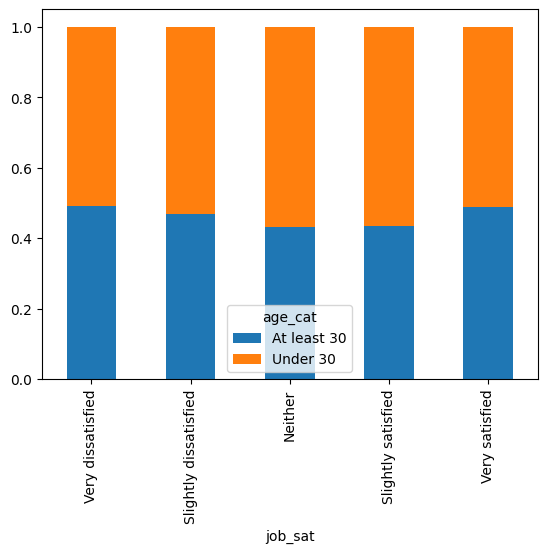

In [23]:
props = (
    stack_overflow
    .groupby("job_sat")["age_cat"]
    .value_counts(normalize = True)
)

wide_props = props.unstack()

wide_props.plot(kind = "bar", stacked = True)

From this chart we may think:

- if the proportions are too close in each category ***the variables are independent***

- if the proportions are too different, ***the variables are not independent***

this chart suggests that the difference is not that big, and we may consider that variables are independent

In this case, we have to perform the chi-squared test to see if the variables are statistically independent

***Calculate degrees of freedom***

in this case, there are two categorical variables with two categories each, then the degrees of freedom are calculated:

$dof =$ (No. of response categories - 1) x (No. of explanatory categories - 1)
$dof = (2-1)*(5-1) = 4$

***Since we have 4 dof, we don't care about yate's correction,*** it is only applied by default when dof = 1.

In [21]:
expected, observed, stats = pingouin.chi2_independence(
    data = stack_overflow,
    x = "job_sat",
    y = "age_cat",
    correction= False
)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


Since p value is not smaller than $\alpha$, we failed to reject $H_0$ and yes, variables are independent!

## Example 3

In the ***late_shipments*** dataset, there is a variable called ***vendor_inco_term*** that describes the incoterms applied to a shipment

***incoterms:*** Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The options are:

EXW: "Ex works". The buyer pays for transportation of the goods.
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
FCA: "Free carrier". The seller pays for transportation of the goods.

Also, remember that the ***freight_cost_group*** explains wether a shipment is expensive or not.

***Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.***

### Checking sample size assumption

In [9]:
# Remove that DDU for convenience (it's only one)
late_shipments = late_shipments[late_shipments["vendor_inco_term"] != "DDU"]

# Count the values of freight_cost_group grouped by vendor_inco_term
counts = (
    late_shipments
    .groupby("vendor_inco_term")["freight_cost_groups"]
    .value_counts()
)
# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
True


Note that each group has at least 5 successes and at least 5 failures, so the assumptions are fulfilled

### Exploring variable independance

<AxesSubplot: xlabel='vendor_inco_term'>

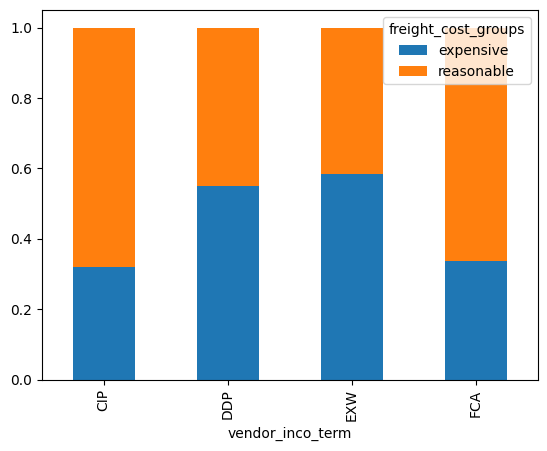

In [10]:
props = (
    late_shipments
    .groupby("vendor_inco_term")["freight_cost_groups"]
    .value_counts(normalize = True)
)

wide_props = props.unstack()

wide_props.plot(kind = "bar", stacked = True)

Looks like these two variables are definitely not independent, but let's test that:

### Performing chi squared test

In [11]:
expected, observed, stats = pingouin.chi2_independence(
    data = late_shipments,
    x = "vendor_inco_term",
    y = "freight_cost_groups"
)

stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,33.642600,3.0,2.357026e-07,0.183511,0.999424
1,cressie-read,0.666667,33.632598,3.0,2.368510e-07,0.183484,0.999423
2,log-likelihood,0.000000,33.895008,3.0,2.084919e-07,0.184198,0.999466
3,freeman-tukey,-0.500000,34.349001,3.0,1.672011e-07,0.185428,0.999533
4,mod-log-likelihood,-1.000000,35.037928,3.0,1.195978e-07,0.187278,0.999620
5,neyman,-2.000000,37.199484,3.0,4.175225e-08,0.192968,0.999802


Finally, we reject the null hypothesis and conclude that these two variables are not independent, they are definitely associated

# Chi squared goodness of fit tests

## Example 1

This test allows to check if a data proportion fits to your proportion assumption or not.

Example:
In the stack overflow dataset, there is a variable called ***Purple link***, this variable measures how users felt when they noticed that clicked the purple link (purple link is literally the first link you get when you google a coding question)

In [41]:
purple_link_counts = (
    stack_overflow["purple_link"]
    .value_counts()
    .rename_axis("purple_link")
    .reset_index(name="n")
    .sort_values("purple_link")
)

purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


that is the original distribution for that answer, which measures what the person felt when noticed that clicked in the purple_link

***Declaring Hypothesis***

let's hypothesize that half of the users would respond "Hello, old friend" and the rest would respond the other three options with the same probability

In [39]:
hypothesized = pd.DataFrame({
    "purple_link" : ["Amused", "Annoyed", "Hello, old friend", "Indifferent"],
    "prop" : [1/6, 1/6, 1/2, 1/6]
})

hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


Like this

Now, our hypotheses would be

$H_0: $ the sample matches the hypothesized distribution

$H_1: $ the sample does not match the hypothesized distribution

$\alpha = 0.01$

let's visualize the thing

first we need to know how many responses we would have gotten in our hypothetic distribution, then we will compare that with the sample

In [40]:
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total

hypothesized

,purple_link,prop,n
0,Amused,0.166667,376.833333
1,Annoyed,0.166667,376.833333
2,"Hello, old friend",0.500000,1130.500000
3,Indifferent,0.166667,376.833333


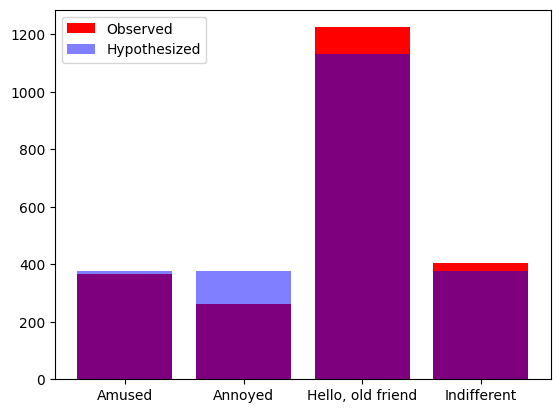

In [42]:
plt.bar(
    purple_link_counts["purple_link"],
    purple_link_counts["n"],
    color = "red", label = "Observed"
)

plt.bar(
    hypothesized["purple_link"],
    hypothesized["n"],
    alpha = 0.5,
    color = "blue", label = "Hypothesized"
)

plt.legend()
plt.show()

From the chart we can see that "Amused" and "Indifferent" are similar in terms of hypothesized and observed values, but "Annoyed" and "Hello, old friend" seem different.

But, is that difference statistically significant?

***Note: this test is called goodness of fit test (PRUEBA DE BONDAD DE AJUSTE) since we are testing how well our hypothesized data fits our actual data***

In [2]:
from scipy.stats import chisquare

In [45]:
chisquare(
    f_obs=purple_link_counts["n"],
    f_exp=hypothesized["n"]
)

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

Since this p-value is very very small, we reject the null hypothesis and conclude that the sample and the hypothesized distribution are different

## Example 2

In [73]:
# Remove that DDU for convenience (it's only one)
late_shipments = late_shipments[late_shipments["vendor_inco_term"] != "DDU"]

incoterm_counts = (
    late_shipments["vendor_inco_term"]
    .value_counts()
    .rename_axis("vendor_inco_term")
    .reset_index(name="n")
    .sort_values("vendor_inco_term")
)

incoterm_counts

,vendor_inco_term,n
3,CIP,56
2,DDP,100
0,EXW,732
1,FCA,111


In [74]:
# Hypothesized ditribution

hypothesized = pd.DataFrame({
    "vendor_inco_term" : ["CIP", "DDP", "EXW", "FCA"],
    "prop" : [0.05, 0.1, 0.75, 0.1]
})

hypothesized

,vendor_inco_term,prop
0,CIP,0.05
1,DDP,0.10
2,EXW,0.75
3,FCA,0.10


In [75]:
# Counts for hypothesized
hypothesized["n"] = hypothesized["prop"] * n_total

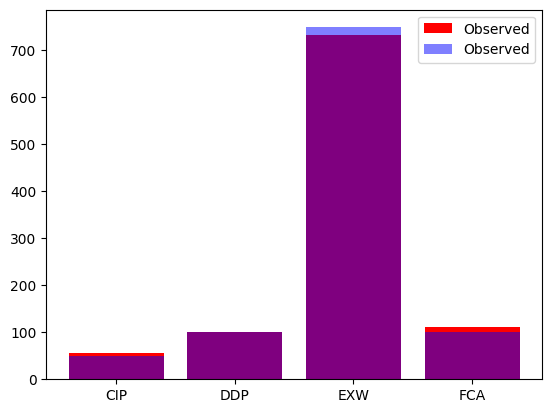

In [76]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(
    incoterm_counts["vendor_inco_term"],
    incoterm_counts["n"],
    color = "red",
    label="Observed")

plt.bar(
    hypothesized['vendor_inco_term'],
    hypothesized['n'],
    alpha = 0.5,
    color="blue", 
    label="Observed")

plt.legend()
plt.show()

As you can see, the distribution matches a lot with our hypothesized values, but is that similarity statistically significant?

In [77]:
gof_test = chisquare(
    f_obs=incoterm_counts["n"],
    f_exp=hypothesized["n"]
)

gof_test

Power_divergenceResult(statistic=2.3633633633633613, pvalue=0.5004909543758689)

Now, note that this p value greater than our significance level, indicates that we failed to reject the null hypothesis and can conclude that the sample fits well to our hypothesized distribution.

# NON Parametric tests

What happens if the assumptions considered in the hypothesis testing are not met?

The tests explained before such as
- z test
- t test
- ANOVA

are ***parametric tests*** and are all based on the assumption that the population is normally distributed

## Wilcoxon-signed rank test  (Paired data)

This test is used for paired data

Given the dataset for election results in the united states for the republicans, let's hypothesize:

$H_0:$ Percentage of votes in 2008 is not smaller than 2012

$H_1:$ Percentage of votes in 2008 is smaller than 2012

In [4]:
repub_votes = pd.read_feather("repub_votes_potus_08_12.feather")

And let's use a small sample

In [8]:
repub_votes_small = repub_votes.sample(5)

repub_votes_small

,state,county,repub_percent_08,repub_percent_12
78,Texas,Lampasas,74.024103,78.026097
19,Illinois,St. Clair,38.139394,41.957544
32,Kentucky,Jessamine,67.829227,68.981728
72,Tennessee,Chester,71.017185,73.073323
90,Washington,San Juan,28.088501,29.365679


since this data is paired, let's try to perform a t-test on this small sample (T TEST IS WRONG BECAUSE THERE IS NO NORMALITY, THIS IS JUST TO DO A DEMONSTRATION)

In [31]:
alpha = 0.01

pingouin.ttest(
    x = repub_votes_small["repub_percent_08"],
    y = repub_votes_small["repub_percent_12"],
    paired = True,
    alternative = "less"
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.020709,4,less,0.007928,"[-inf, -1.16]",0.115798,10.108,0.07693


Basically t-test rejeccts the null hypothesis and suggests that 

***vote percentages for 2008 are smaller than percentage for 2012***

### Wicoxon test process

There are many different ways to perform tests without the parametric assumptions, Wilcoxon test is one method related to ***ranks***

In [13]:
from scipy.stats import rankdata

# Creating a list to see it's ranks
x = [1,15,3,10,6]

ranks are the orderings from smallest to largest, scipy.stats allows to access the ranks of a list

In [14]:
rankdata(x)

array([1., 5., 2., 4., 3.])

This tests requires us to calculate the absolute differences in the pairs of data and then rank them

Now, let's explain how it works...

***First***, we take differences in the paired values

In [16]:
repub_votes_small["diff"] = repub_votes_small["repub_percent_08"] -  repub_votes_small["repub_percent_12"]

repub_votes_small[["repub_percent_08", "repub_percent_12", "diff"]]

,repub_percent_08,repub_percent_12,diff
78,74.024103,78.026097,-4.001994
19,38.139394,41.957544,-3.818150
32,67.829227,68.981728,-1.152501
72,71.017185,73.073323,-2.056138
90,28.088501,29.365679,-1.277178


***Next***, we take the absolute value of the differences

In [17]:
repub_votes_small["abs_diff"] = repub_votes_small["diff"].abs()

repub_votes_small[["repub_percent_08", "repub_percent_12", "diff", "abs_diff"]]

,repub_percent_08,repub_percent_12,diff,abs_diff
78,74.024103,78.026097,-4.001994,4.001994
19,38.139394,41.957544,-3.818150,3.818150
32,67.829227,68.981728,-1.152501,1.152501
72,71.017185,73.073323,-2.056138,2.056138
90,28.088501,29.365679,-1.277178,1.277178


Then, we rank these absolute differences

In [19]:
repub_votes_small["rank_abs_diff"] = rankdata(repub_votes_small["abs_diff"])

repub_votes_small[["repub_percent_08", "repub_percent_12", "diff", "abs_diff","rank_abs_diff"]]

,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
78,74.024103,78.026097,-4.001994,4.001994,5.0
19,38.139394,41.957544,-3.818150,3.818150,4.0
32,67.829227,68.981728,-1.152501,1.152501,1.0
72,71.017185,73.073323,-2.056138,2.056138,3.0
90,28.088501,29.365679,-1.277178,1.277178,2.0


Finally, we calculate a test statistic called **W**

**W** uses the signs of the diff column to split the ranks into two groups:

- One group for rows with *negative differences*

- One group for rows with *positive differences*

T_minus is the sum of the ranks with negative differences

In [25]:
print(repub_votes_small[repub_votes_small["diff"] < 0]["rank_abs_diff"])

T_minus = sum (repub_votes_small[repub_votes_small["diff"] < 0]["rank_abs_diff"])

print(T_minus)

78    5.0
19    4.0
32    1.0
72    3.0
90    2.0
Name: rank_abs_diff, dtype: float64
15.0


T_plus is the sum of the ranks with positive differences

In [26]:
print(repub_votes_small[repub_votes_small["diff"] > 0]["rank_abs_diff"])

T_plus = sum (repub_votes_small[repub_votes_small["diff"] > 0]["rank_abs_diff"])

print(T_plus)

Series([], Name: rank_abs_diff, dtype: float64)
0


IN THIS EXAMPLE, ALL THE DIFFERENCES ARE NEGATIVE, SO THE T-MINUS IS THE SUM OF ALL RANKS AND THE T-PLUS IS ZERO.

Now, the test statistic W is the smaller of T-minus and T-plus, *in this case it is zero*

In [28]:
W = np.min([T_minus, T_plus])

W

0.0

Now, we can calculate W and its corresponding p-value using a pingouin method instead of manual calculation.

### pingouin.wilcoxon

In [29]:
alpha = 0.01
pingouin.wilcoxon(
    x = repub_votes_small["repub_percent_08"],
    y = repub_votes_small["repub_percent_12"],
    alternative="less"
)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.6


Note that the W value returned is the same as our manual calculation

How do we compare this value with the obtained from the T-test?

Remember that ***t-test*** rejects the null hypothesis and suggests that 

- ***vote percentages for 2008 are not greater than percentage for 2012***

But ***wilcoxon*** tells us

- ***There is not enough evidence that vote percentages for 2008 are smaller than percentages for 2012*** using this small sample of five rows

## Wilcoxon-Mann-Whitney test (Independent data)

This test works for independent numeric samples

Also known as the ***Mann Whitney U test***

This test also works with ranked data, and it is ***roughly speaking, a t-test on ranked data***

Let's return to the ***converted compensation*** vs ***the age people began coding***

$H_0:$ Those who code first as children do not have a higher income than those who code first as adults

$H_1:$ Those who code first as children have a higher income than those who code first as adults

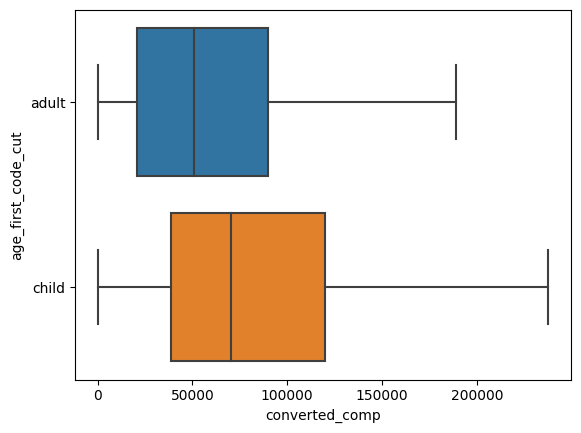

In [36]:
sns.boxplot(
    x = stack_overflow["converted_comp"],
    y = stack_overflow["age_first_code_cut"],
    data = stack_overflow,
    showfliers = False  # removing the outliers just for the chart to look better
)

plt.show()

in general, it is visible that people who started coding as childs are better compensated than those who started coding as adults, let's perform our ***Wilcoxon-Mann-Whitney*** test

first, we select just the columns we need:

In [37]:
age_vs_comp = stack_overflow[["converted_comp", "age_first_code_cut"]]

now, to conduct the Wilcoxon-Mann-Whitney test, we need to convert our data from long to wide format

In [40]:
age_vs_comp_wide = age_vs_comp.pivot(columns="age_first_code_cut", values="converted_comp")

age_vs_comp_wide.head()

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN


In [41]:
alpha = 0.01

pingouin.mwu(
    x = age_vs_comp_wide["child"],
    y = age_vs_comp_wide["adult"],
    alternative = "greater"
)

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


With this very small p-value, we can be sure that people who started coding as childs, earn more money

## Kruskal-Wallis test

Kruskal-Wallist test is to Wilcoxon-Mann-Whitney test

as

ANOVA is to t-test

Meaning, ***this is the non parametric way to test a numeric variable across more than two groups***.

That is ***The Kruskall-Wallis*** test is the non parametric version of ANOVA

let's use this test to see if there is a difference in converted_comp between job satisfaction groups

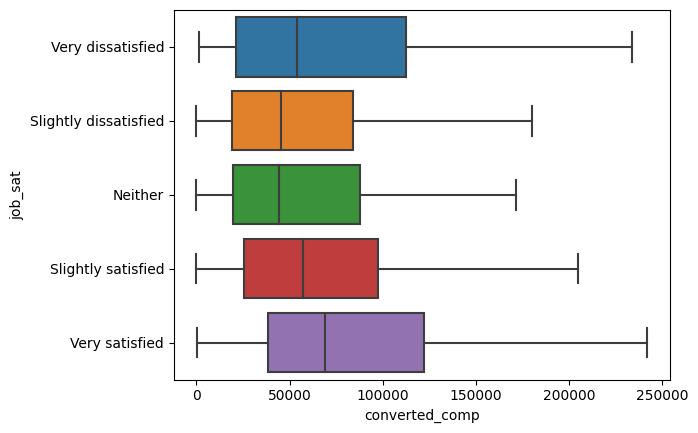

In [45]:
sns.boxplot(
    x = stack_overflow["converted_comp"],
    y = stack_overflow["job_sat"],
    data = stack_overflow,
    showfliers = False  # removing the outliers just for the chart to look better
)

plt.show()

In [46]:
alpha = 0.01

pingouin.kruskal(
    data = stack_overflow,
    dv = "converted_comp",
    between = "job_sat"
)

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


The p-value is very smaller than our significance level, this provides evidence that at least one of the mean compensation totals is different than the others across these five job satisfaction groups

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d5a8929-1553-437b-8664-b4ebddd14d21' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>